# Packages Needed.

Below are some of the inbuilt packages which are used.

1. Numpy - To use to create Arrays.
2. Random - To generate random numbers.
3. Math - to use certain inbuilt functions like pi, cos, square root.
4. mathplot lib - To create Graphs.

In [458]:
import numpy as np
from random import random
from math import sin, sqrt
import pandas as pd
import math
from random import random
import copy
import matplotlib.pyplot
from matplotlib.pyplot import figure

# Fitness function dejong.

function [y,grad]=dejong(x)

    1. % this is an arbitrarily dimensioned function
    2. % input: x - n x d input matrix (n d-dimensional vectors)
    3. % global min is at x = [0,0,...,0]
    4. y = sum(x.^2,2);grad = 2.*x;

In [185]:
def dejong(x):
    y=sum(np.power(x, 2))
    grad=np.array(x) * 2
    return y

# Fitness Function Ackley
Equivalent Matlab code and below I have converted to Python Equivalent.

function [y]=ackley(x)
1. % this is an arbitrarily dimensioned function
2. % input: x - n x d input matrix (n d-dimensional vectors)
3. % global min is at x = [0,0,...,0]
4. a = 20; b = 0.2; c = 2*pi;
5. [n,d]=size(x);
6. y = -a*exp(-b*sqrt(1/d*sum(x.^2,2)))-exp(1/d*sum(cos(c*x),2))+a+exp(1);

In [487]:
def ackley(x):
    firstSum = 0.0
    secondSum = 0.0
    for c in x:
        firstSum += c**2.0
        secondSum += math.cos(2.0*math.pi*c)
    n = float(len(x))
    return -20.0*math.exp(-0.2*math.sqrt(firstSum/n)) - math.exp(secondSum/n) + 20 + math.e

# function [y,grad]=rastrigin(x)
Equivalent Matlab code and below I have converted to Python Equivalent.
1. % this is an arbitrarily dimensioned function
2. % input: x - n x d input matrix (n d-dimensional vectors)
3. % global min is at x = [0,0,...,0]
4. [n,d]=size(x);
5. y = 10*d + sum(x.^2-10*cos(2*pi*x),2);
6. grad = 2.*x + 20*pi*sin(2*pi*x);

In [323]:
def rastrigin(x):
    sum=0
    for i in range(0,len(x)):
        sum+=(x[i]**2-10*np.cos(2*np.pi*x[i]))
    sum+=10*len(x)
    return sum

# function [y]=branins(x)
Equivalent Matlab code and below I have converted to Python Equivalent.
1. this is a 2-dimensional function
2. input: x - n x 2 input matrix (n 2-dimensional vectors)
3. 3 global mins
4. (-pi, 12.275), (pi, 2.275), and (9.42478, 2.475)
5. usually evaluated on x1 in [-5,10] and x2 in [0,15]
6. a = 1; b = 5.1/(4*pi^2); c = 5/pi; d = 6; e = 10; f = 1/(8*pi);
7. y = a*(x(:,2)-b*x(:,1).^2+c*x(:,1)-d).^2 + e*(1-f)*cos(x(:,1))+e;

In [490]:
def branins(x):
    a=1
    b=5.1/(4*np.pi**2)
    c=5/np.pi
    d=6
    e=10
    f=1/(8*np.pi)
    y=a*(x[i]-b*x[0]**2+c*x[0]-d)**2+e*(1-f)*np.cos(x[0])+e
    return y

# function [y]=rosenbrock(x)
Equivalent Matlab code and below I have converted to Python Equivalent.
1. this is an arbitrarily dimensioned function
2. input: x - n x d input matrix (n d-dimensional vectors)
3. global min is at x = [1,1,...,1]
4. y = sum(100*(x(:,2:end)-x(:,1:end-1).^2).^2+(x(:,1:end-1)-1).^2,2);

In [492]:
def rosenbrock(x):
    y=(sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0))
    return y

# Population.

Random Population for Given N dimensions.

In [135]:
def get_population_matrix(low,high,dimensions,pop_size):
    particles = np.array([])
    particles = np.random.uniform(low,high,size=(pop_size, dimensions))
    return particles

# Algorithm

The Algorithm Psuedo Code 

For each particle in swarm
	Initialize the particle position, fitness, best fitness, position in dictionary
End
While Iterations<100
	For each particle 
	     Calculate fitness value 
                 If the fitness value is better than best fitness value 
 	     Set the current values as the new best fitness value
           End
Choosing the particle with best value as the global best 
For each particle 
	Calculating the velocity from the above equation a
	Update the position of particle using eqn b
End


In [494]:
def myPSO(fitness_func,xrange,dim):
    # Cognitive and Social Parameters are kept constant for all runs 
    c1=1.8
    c2=2
    #Population of swarm or The Particles is kept as 100
    start_particles_size=0
    end_particles_size=100
    #Xrange is divided into both negative half and positive half.
    low=-(xrange/2)
    high=xrange/2
    #Creating an empty Dictionary for Storing the indexes for Particles or swarm.
    swarm = {'index': None,'v': None,'fitness': None,'fx_best': None,'f_best': None}
    CostFunction = fitness_func
    yaxis=np.arange(0, iter, 1)
    global_bestarr=[]
    # An array to Store the best index and fitness
    global_best = {'index': None, 'fitness': np.inf}
    particles = [];
    #Keeping the momentum values constant at 0.22
    momentum = 0.22
    iteration = 0
    # Creating the population finding the best Fitness if higher than the previous element then replace with the new fitness
    for element in range(start_particles_size, end_particles_size):
        particles += [copy.deepcopy(swarm)];
        particles[element]['index'] = np.random.uniform(low, high, dim);
        particles[element]['v'] = np.zeros(dim);
        particles[element]['fitness'] = CostFunction(particles[element]['index']);
        particles[element]['fx_best'] = copy.deepcopy(particles[element]['index']);
        particles[element]['f_best'] = particles[element]['fitness'];
        if particles[element]['f_best'] < global_best['fitness']:
            global_best['index'] = copy.deepcopy(particles[element]['fx_best']);
            global_best['fitness'] = particles[element]['f_best'];
    #running the algorithm for 100 iterations that is the stopping criteria.
    while(iteration < 100):
        for element in range(start_particles_size, end_particles_size):
           #vid=wvid+c1rand () pid−xid () +c2rand () pgd−xid () Below is this equation.
            particles[element]['v'] = momentum*particles[element]['v'] + c1*np.random.rand(dim)*(particles[element]['fx_best'] - particles[element]['index']) + c2*np.random.rand(dim)*(global_best['index'] - particles[element]['index']);
            #xid=xid+vid
            particles[element]['index'] += particles[element]['v'];
            particles[element]['index'] = np.maximum(particles[element]['index'], low);
            particles[element]['index'] = np.minimum(particles[element]['index'], high);

            particles[element]['fitness'] = CostFunction(particles[element]['index']);
           
            if particles[element]['fitness'] < particles[element]['f_best']:
                particles[element]['fx_best'] = copy.deepcopy(particles[element]['index']);
                particles[element]['f_best'] = particles[element]['fitness'];

                if particles[element]['f_best'] < global_best['fitness']:
                    global_best['index'] = copy.deepcopy(particles[element]['fx_best']);
                    global_best['fitness'] = particles[element]['f_best'];
        momentum *= 0.995;
        global_bestarr += [global_best['fitness']]
        iteration += 1
       
    ax=plt.axes()
    plt.title('Squared Error VS Iteration')
    plt.ylabel('Squared Error')
    plt.xlabel('iteration')
    ax.grid(which='both')
    ax.plot(yaxis,global_bestarr)
    return global_best, particles;

# Calling the Main Function

The inputs to the mypso are 

1. Benchmark functions
    a. Dejong.
    b. Ackley.
    c. Rastrigin.
    d. Rosenbrock.
    e. Branins.
2. Xrange - The range of values to be searched in space.
3. Dimensions - Represents the number of Dimensions in Search space.

0.004987145362409704




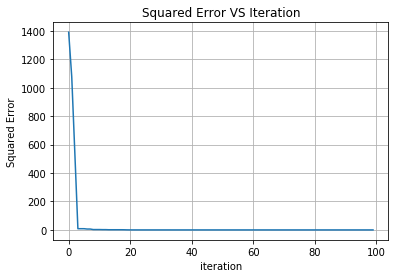

In [496]:
#Funcition Call.
gbest,pop=myPSO(rosenbrock,50,3)
print(gbest['fitness'])
print('\n')